In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
#Define datapath
datapath='~/Desktop/Capstone 1/DATA/'

In [3]:
#Load department codes and product codes
product_code=pd.read_excel(datapath+'LM Departments & Product Groups Keys.xlsx')
product_code

FileNotFoundError: ignored

In [ ]:
product_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Department Dim              112 non-null    int64 
 1   Department Dim Description  112 non-null    object
 2   Product Group Code          99 non-null     object
 3   Product Group Description   101 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.6+ KB


In [ ]:
product_code[product_code['Department Dim Description']=='Books']

,Department Dim,Department Dim Description,Product Group Code,Product Group Description
14,504,Books,NaN,NaN
15,504,Books,50400,Code of Federal Regulations
16,504,Books,50401,International Air Transport Association
17,504,Books,50402,Early 49 CFR
18,504,Books,50403,ERG
19,504,Books,50404,International Maritime Organization
20,504,Books,50405,Trucking Supplies
21,504,Books,50406,International Civil Air Organization
22,504,Books,50407,MasterRegs 49 CFR
23,504,Books,50408,Reference Books


In [ ]:
code=product_code[product_code['Department Dim Description']=='Books']['Product Group Code'].dropna().astype('int')
description=product_code[product_code['Department Dim Description']=='Books']['Product Group Description'].dropna()
product_group_dic=dict(zip(code,description))
product_group_dic

{50400: 'Code of Federal Regulations',
 50401: 'International Air Transport Association',
 50402: 'Early 49 CFR',
 50403: 'ERG',
 50404: 'International Maritime Organization',
 50405: 'Trucking Supplies',
 50406: 'International Civil Air Organization',
 50407: 'MasterRegs 49 CFR',
 50408: 'Reference Books',
 50409: 'Online Compliance Training',
 50420: 'inactive',
 50709: 'Reg Sticks'}

In [ ]:
#sales
datapath='~/Desktop/Capstone 1/DATA/'
file_name='Labelmaster Daily Sales Part {}.xlsx'
sales=[]
for i in range(1,10):
    df = pd.read_excel (datapath+file_name.format(i),skiprows=range(0,2))
    sales.append(df)
    
sales = pd.concat(sales)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267630 entries, 0 to 75629
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Department Dim      1267630 non-null  int64         
 1   Product Group Code  965125 non-null   float64       
 2   Posting Date        1267630 non-null  datetime64[ns]
 3   Sum of Sales        1267630 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 48.4 MB


In [ ]:
sales.shape

(1267630, 4)

In [ ]:
sales

,Department Dim,Product Group Code,Posting Date,Sum of Sales
0,505,50500.0,1993-01-04,5434.70
1,506,50600.0,1993-01-04,129.76
2,506,50606.0,1993-01-04,361.00
3,507,NaN,1993-01-04,326.40
4,511,51101.0,1993-01-04,566.45
...,...,...,...,...
75625,514,51402.0,2021-04-12,10211.46
75626,516,51601.0,2021-04-12,97.10
75627,517,51701.0,2021-04-12,5373.51
75628,507,NaN,2021-04-13,825.00


In [ ]:
#Mismatch of product group 
sales[(sales['Department Dim']!=504)]['Product Group Code'].isin(product_group_dic.keys()).sum()

3318

In [ ]:
df=sales[(sales['Department Dim']!=504)][sales[(sales['Department Dim']!=504)]['Product Group Code']
                                         .isin(product_group_dic.keys())]
df

,Department Dim,Product Group Code,Posting Date,Sum of Sales
4916,519,50408.0,1996-08-14,0.00
5135,519,50408.0,1996-10-08,0.00
6616,507,50408.0,1997-10-07,990.00
6732,507,50408.0,1997-11-04,495.00
7910,507,50408.0,1998-08-21,149.95
...,...,...,...,...
45307,507,50709.0,2017-08-09,-49.00
46099,507,50709.0,2017-09-12,49.00
46553,507,50709.0,2017-09-29,0.00
47859,507,50709.0,2017-11-28,350.50


In [ ]:
mismatch=df['Product Group Code'].unique()
df['Product Group Code'].value_counts()
#50408 referenced books
#50409 Online Compliance Training
#50709 Reg Sticks


50709.0    1625
50409.0     881
50408.0     812
Name: Product Group Code, dtype: int64

In [ ]:
mismatch

array([50408., 50409., 50709.])

In [ ]:
df['Department Dim'].value_counts()

507    3306
519      12
Name: Department Dim, dtype: int64

In [ ]:
#Check the last transaction of the mismatch product group code

for i in mismatch:
    print(i)
    a=sales.sort_values('Posting Date')
    print(a[a['Product Group Code']==i].tail(10))
    print('-'*60)

50408.0
        Department Dim  Product Group Code Posting Date  Sum of Sales
148708             504             50408.0   2021-03-29        614.62
148737             504             50408.0   2021-03-30         59.00
148771             504             50408.0   2021-03-31         68.80
148802             504             50408.0   2021-04-01        489.75
148855             504             50408.0   2021-04-05         28.75
148879             504             50408.0   2021-04-06        803.29
148906             504             50408.0   2021-04-07       1470.88
148933             504             50408.0   2021-04-08         89.23
148959             504             50408.0   2021-04-09       2296.70
148991             504             50408.0   2021-04-12        195.00
------------------------------------------------------------
50409.0
        Department Dim  Product Group Code Posting Date  Sum of Sales
148738             504             50409.0   2021-03-30         399.0
148772       

<font color='chocolate'>**50709 belongs to SOFTWARE (507) department.**</font>

<font color='chocolate'>So we need to change the `Department Dim` of 50408 and 50409 to **504**  
and `Department Dim` of 50709 to **507**</font>

In [ ]:
sales_1=sales.copy('deep')
sales_1.loc[sales_1['Product Group Code'].isin([50408,50409]),'Department Dim']=504
sales_1.loc[sales_1['Product Group Code']==50709,'Department Dim']=507

In [ ]:
#drop 50709 from product_group_dic
product_group_dic.pop(50709)

'Reg Sticks'

In [ ]:
product_group_dic

{50400: 'Code of Federal Regulations',
 50401: 'International Air Transport Association',
 50402: 'Early 49 CFR',
 50403: 'ERG',
 50404: 'International Maritime Organization',
 50405: 'Trucking Supplies',
 50406: 'International Civil Air Organization',
 50407: 'MasterRegs 49 CFR',
 50408: 'Reference Books',
 50409: 'Online Compliance Training',
 50420: 'inactive'}

In [ ]:
#double check
sales_1[(sales_1['Department Dim']!=504)][sales_1[(sales_1['Department Dim']!=504)]['Product Group Code']
                                         .isin(product_group_dic.keys())]

,Department Dim,Product Group Code,Posting Date,Sum of Sales


In [ ]:
# extract sales data of our department 
books=sales_1[sales_1['Department Dim']==504]
#if you want to sort by date
#books=sales_1[sales_1['Department Dim']==504].sort_values('Posting Date')
books

,Department Dim,Product Group Code,Posting Date,Sum of Sales
71,504,NaN,1993-01-19,7894.70
147,504,NaN,1993-02-05,22344.20
170,504,NaN,1993-02-11,29866.15
187,504,NaN,1993-02-17,15392.85
264,504,NaN,1993-03-09,7669.10
...,...,...,...,...
75465,504,50401.0,2021-04-06,558.00
75501,504,50402.0,2021-04-07,788.56
75502,504,50409.0,2021-04-07,2691.00
75567,504,50400.0,2021-04-09,2.10


In [ ]:
#NaN Product Group in books
#treat them as a product group
#50000:NaN product Group
print(books.isnull().sum())

books.loc[books['Product Group Code'].isnull(),'Product Group Code']=50000.0

Department Dim             0
Product Group Code    124871
Posting Date               0
Sum of Sales               0
dtype: int64


/Users/xwcchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print(books.isnull().sum())

Department Dim        0
Product Group Code    0
Posting Date          0
Sum of Sales          0
dtype: int64


In [ ]:
#add 00000 to product_group_dic
product_group_dic[int(50000)]='NaN'
product_group_dic

{50400: 'Code of Federal Regulations',
 50401: 'International Air Transport Association',
 50402: 'Early 49 CFR',
 50403: 'ERG',
 50404: 'International Maritime Organization',
 50405: 'Trucking Supplies',
 50406: 'International Civil Air Organization',
 50407: 'MasterRegs 49 CFR',
 50408: 'Reference Books',
 50409: 'Online Compliance Training',
 50420: 'inactive',
 50000: 'NaN'}

In [ ]:
# Normalize the datetime
books['Posting Date']=books['Posting Date'].dt.normalize()

<ipython-input-33-11e3a9cf4f99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Posting Date']=books['Posting Date'].dt.normalize()


In [ ]:
#Check duplicated
books.duplicated(['Department Dim','Product Group Code','Posting Date']).sum()

131823

In [ ]:
# Address the issue of aggregation error
# There should be only one transaction record for a given Product Group on a given day

books_final=pd.DataFrame(books.groupby(['Department Dim','Product Group Code','Posting Date'])['Sum of Sales'].sum().reset_index())
books_final

,Department Dim,Product Group Code,Posting Date,Sum of Sales
0,504,50000.0,1993-01-04,7963.55
1,504,50000.0,1993-01-05,14667.70
2,504,50000.0,1993-01-06,8421.50
3,504,50000.0,1993-01-07,11616.85
4,504,50000.0,1993-01-08,15092.72
...,...,...,...,...
30352,504,50409.0,2021-04-07,2691.00
30353,504,50409.0,2021-04-09,0.00
30354,504,50409.0,2021-04-11,7899.00
30355,504,50409.0,2021-04-12,3807.40


In [ ]:
books_final.duplicated(['Department Dim','Product Group Code','Posting Date']).sum()

0

In [ ]:
books_final['Year']=books_final['Posting Date'].dt.year
books_final['Month']=books_final['Posting Date'].dt.month

In [ ]:
books_final

,Department Dim,Product Group Code,Posting Date,Sum of Sales,Year,Month
0,504,50000.0,1993-01-04,7963.55,1993,1
1,504,50000.0,1993-01-05,14667.70,1993,1
2,504,50000.0,1993-01-06,8421.50,1993,1
3,504,50000.0,1993-01-07,11616.85,1993,1
4,504,50000.0,1993-01-08,15092.72,1993,1
...,...,...,...,...,...,...
30352,504,50409.0,2021-04-07,2691.00,2021,4
30353,504,50409.0,2021-04-09,0.00,2021,4
30354,504,50409.0,2021-04-11,7899.00,2021,4
30355,504,50409.0,2021-04-12,3807.40,2021,4


## Export the cleaned sales and books data

sales_1.to_csv('~/Desktop/cleaned_sales.csv')
books_final.to_csv('~/Desktop/cleaned_books.csv')

-----

# EDA of sales

#### Number of transaction

In [ ]:
a=books_final.groupby('Product Group Code')['Sum of Sales'].count()
a

Product Group Code
50000.0    4984
50400.0    2591
50401.0    1860
50402.0    2083
50403.0    2230
50404.0    2410
50405.0    4251
50406.0     848
50407.0    1889
50408.0    4235
50409.0    2975
50420.0       1
Name: Sum of Sales, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

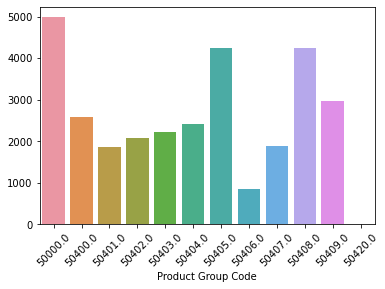

In [ ]:
sns.barplot(x=a.index,y=a.values)
plt.xticks(rotation=45)

#### Sum of sales


In [ ]:
a=books_final.groupby('Product Group Code')['Sum of Sales'].sum()
a

Product Group Code
50000.0    65481765.52
50400.0     1965489.69
50401.0    12288016.29
50402.0     2503286.25
50403.0     4457382.46
50404.0     4784798.37
50405.0     2850430.55
50406.0      660858.17
50407.0     1047259.01
50408.0     5344630.52
50409.0     2074104.77
50420.0        1404.00
Name: Sum of Sales, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

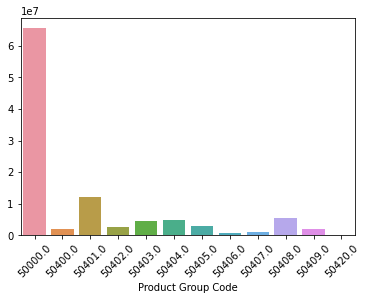

In [ ]:
sns.barplot(x=a.index,y=a.values)
plt.xticks(rotation=45)

#### daily sales

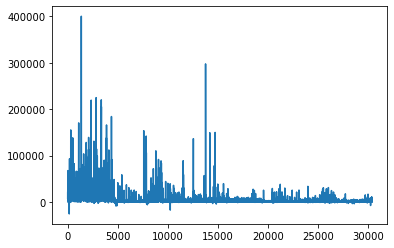

In [ ]:
books_final['Sum of Sales'].plot(x='Posting Date')

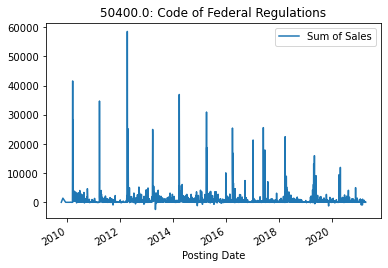

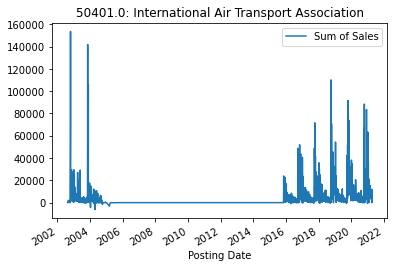

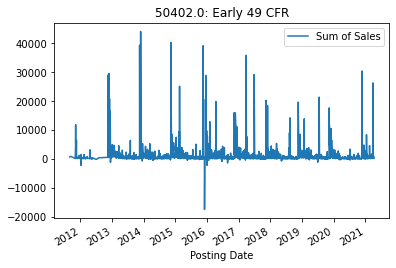

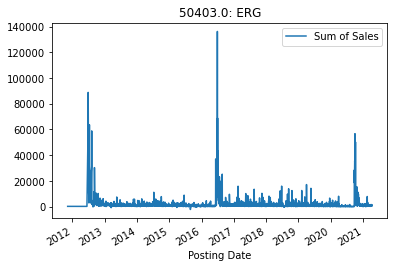

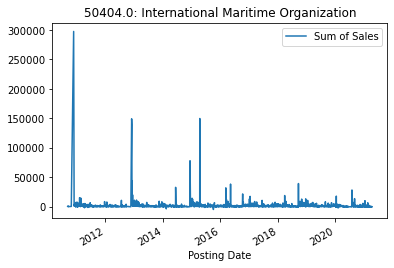

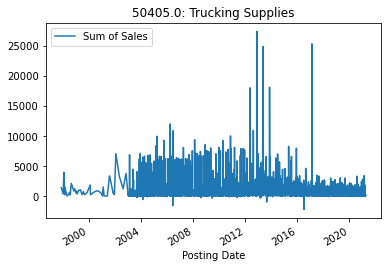

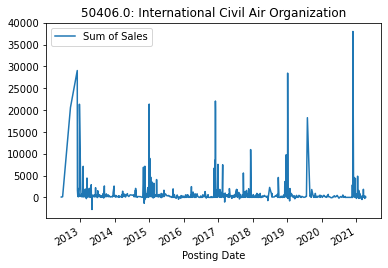

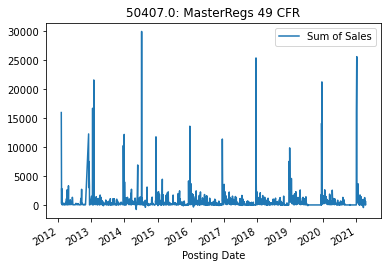

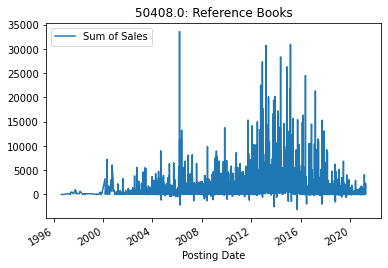

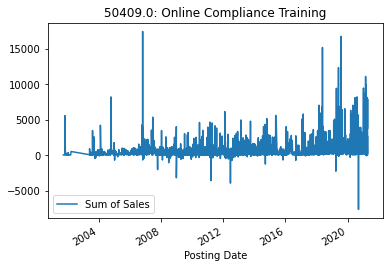

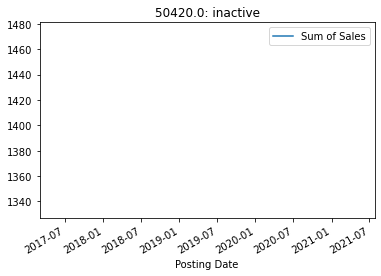

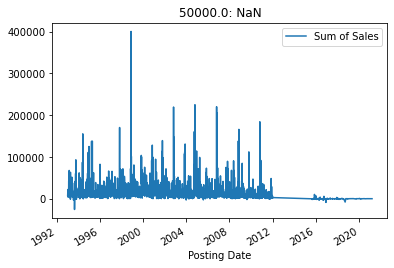

In [ ]:
for i in list(product_group_dic.keys()):
    s=books_final[books_final['Product Group Code']==float(i)].sort_values('Posting Date')
    s.plot(x='Posting Date', y='Sum of Sales')
    plt.title('%s: %s' %(i,product_group_dic[i]))
    plt.legend()
    
    

Findings:  
1. IATA(50401) has a long period of zero sales from around 2005 to 2016. (clear seasonality)
2. Trucking supplies(50405) has a surge of sales around 2013/2014 and 2017.  
3. Referenced books (50408) has a big sales around 2006, higher than usual sales from 2013 to 2017/18.  
4. Online compliance training (50409): high sales rev in 2006/7. 
5. CFR (50400), seasonality with decreasing sales rev.  
6. IMO (50404): seasonality, decreasing sales. 
7. Early 49 CFR (50402): seasoanlity
8. ERG (50403): seasonality, with high sales in the middle of 2012, **2017**, 2020.


### Monthly Sales

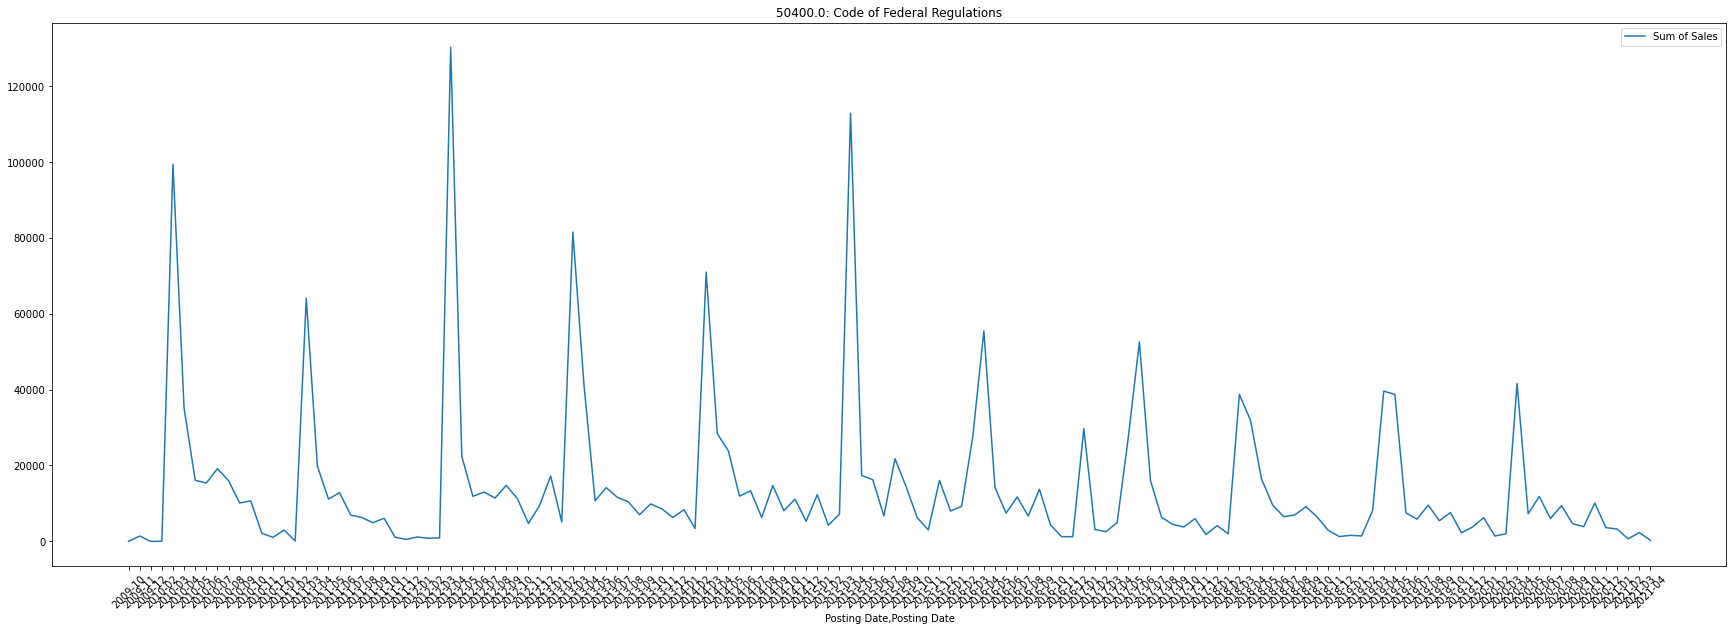

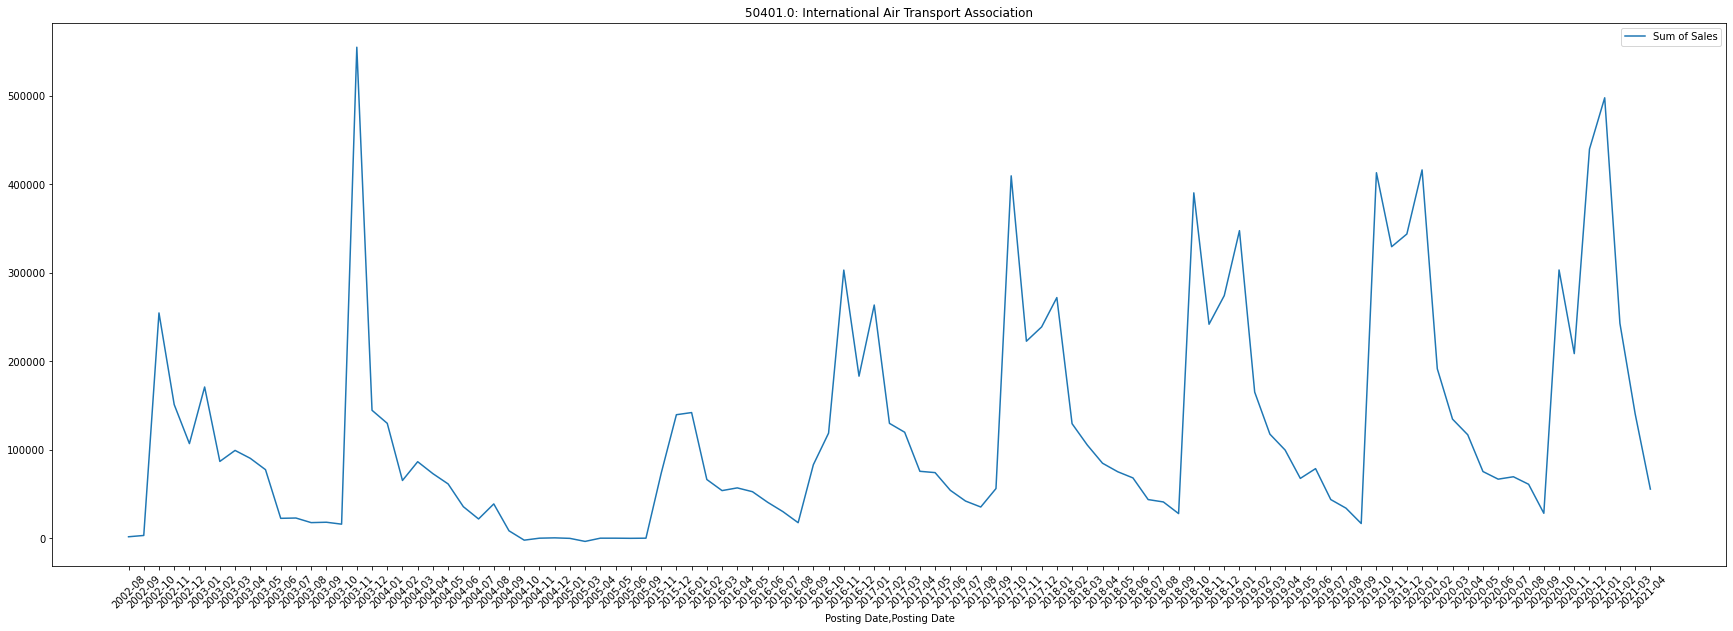

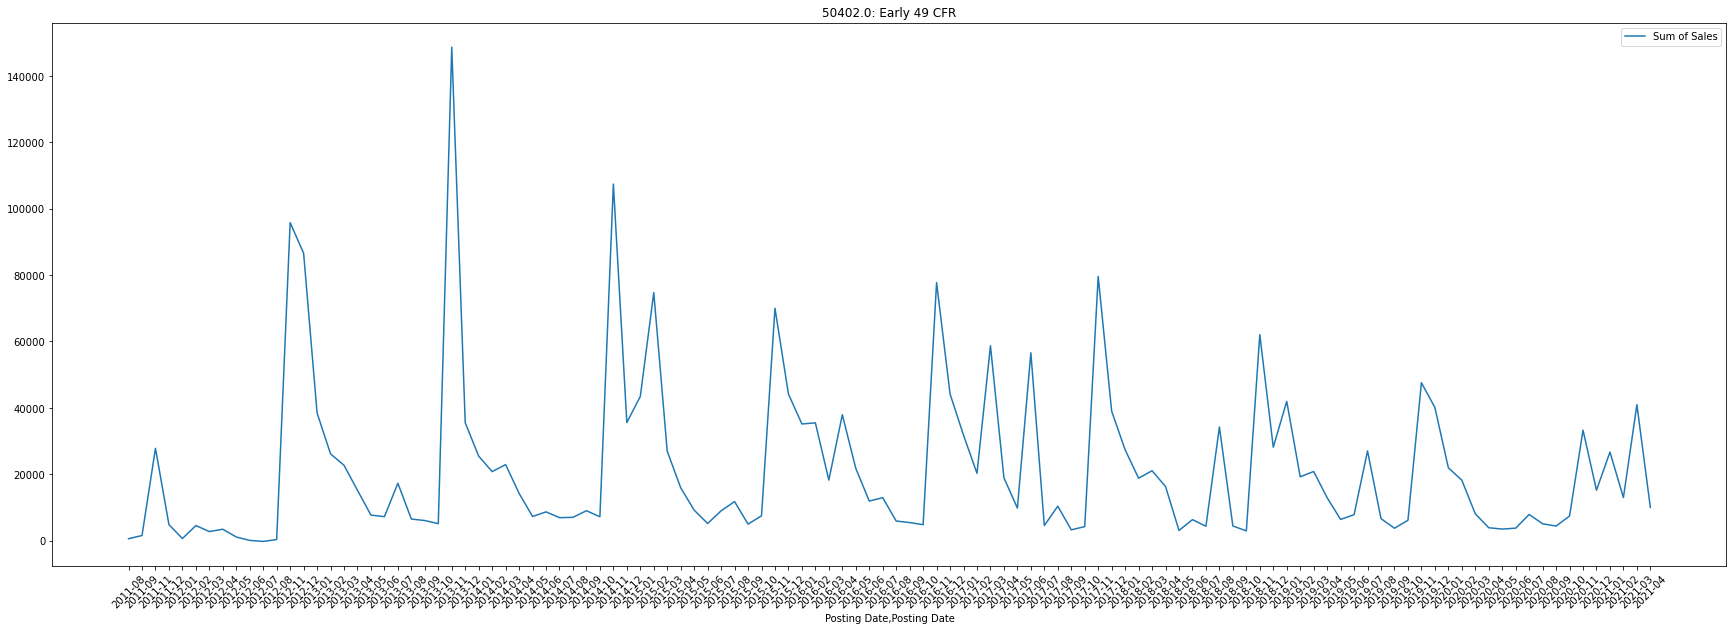

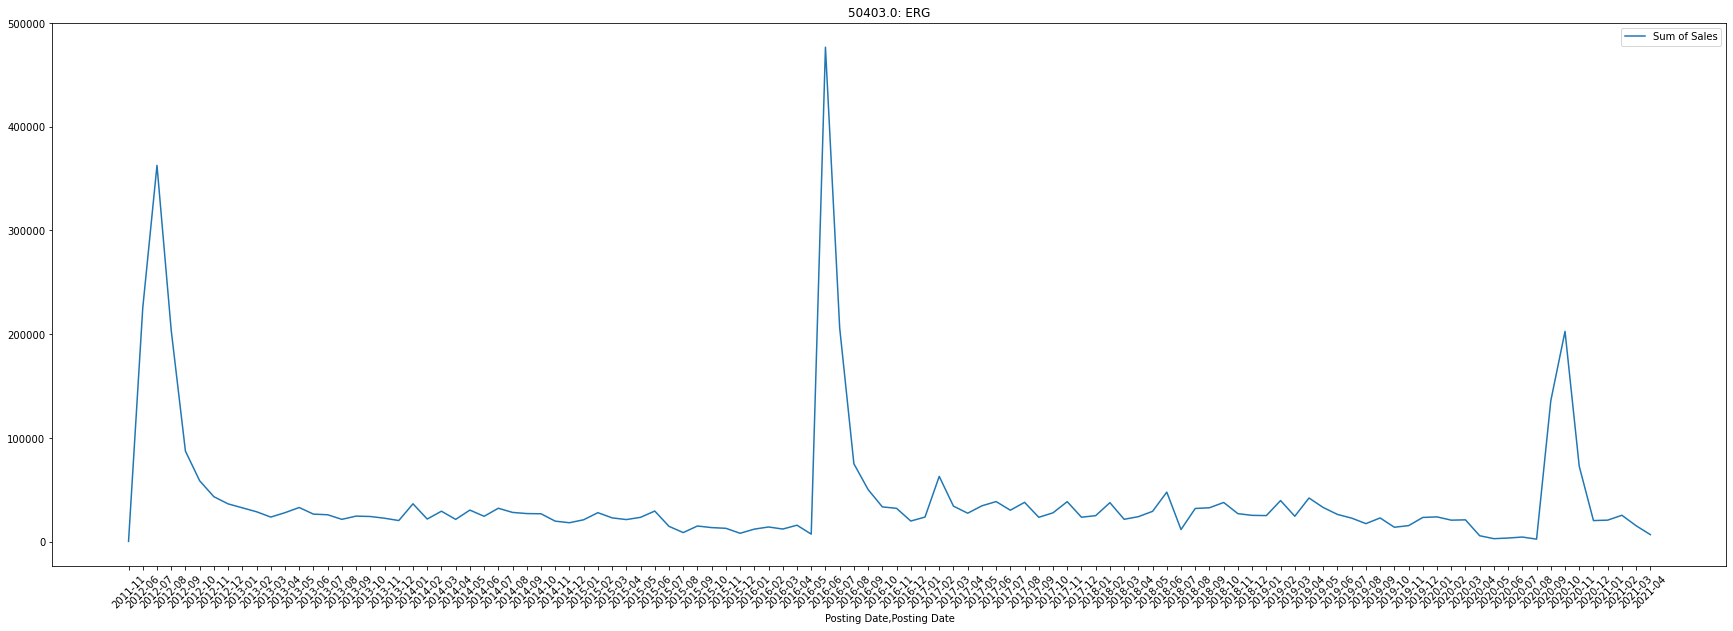

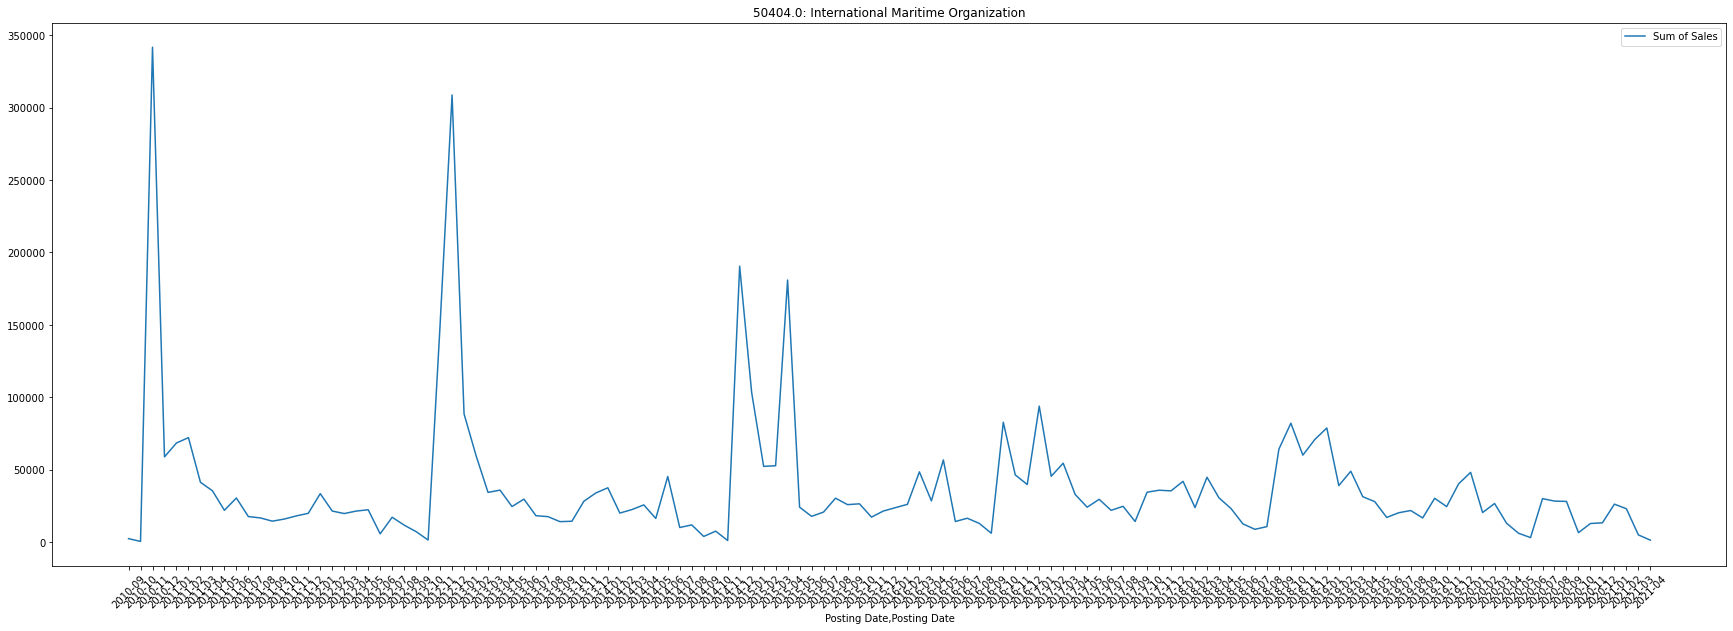

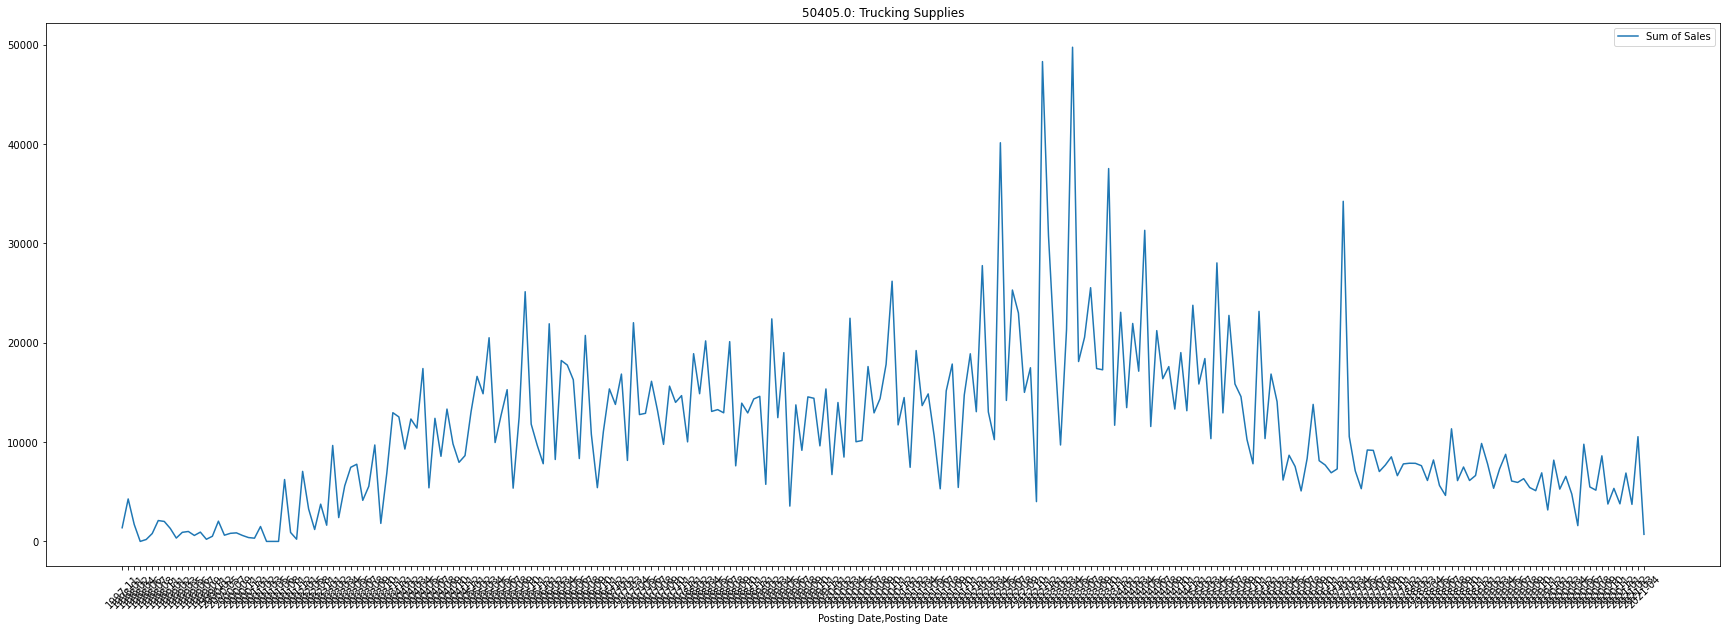

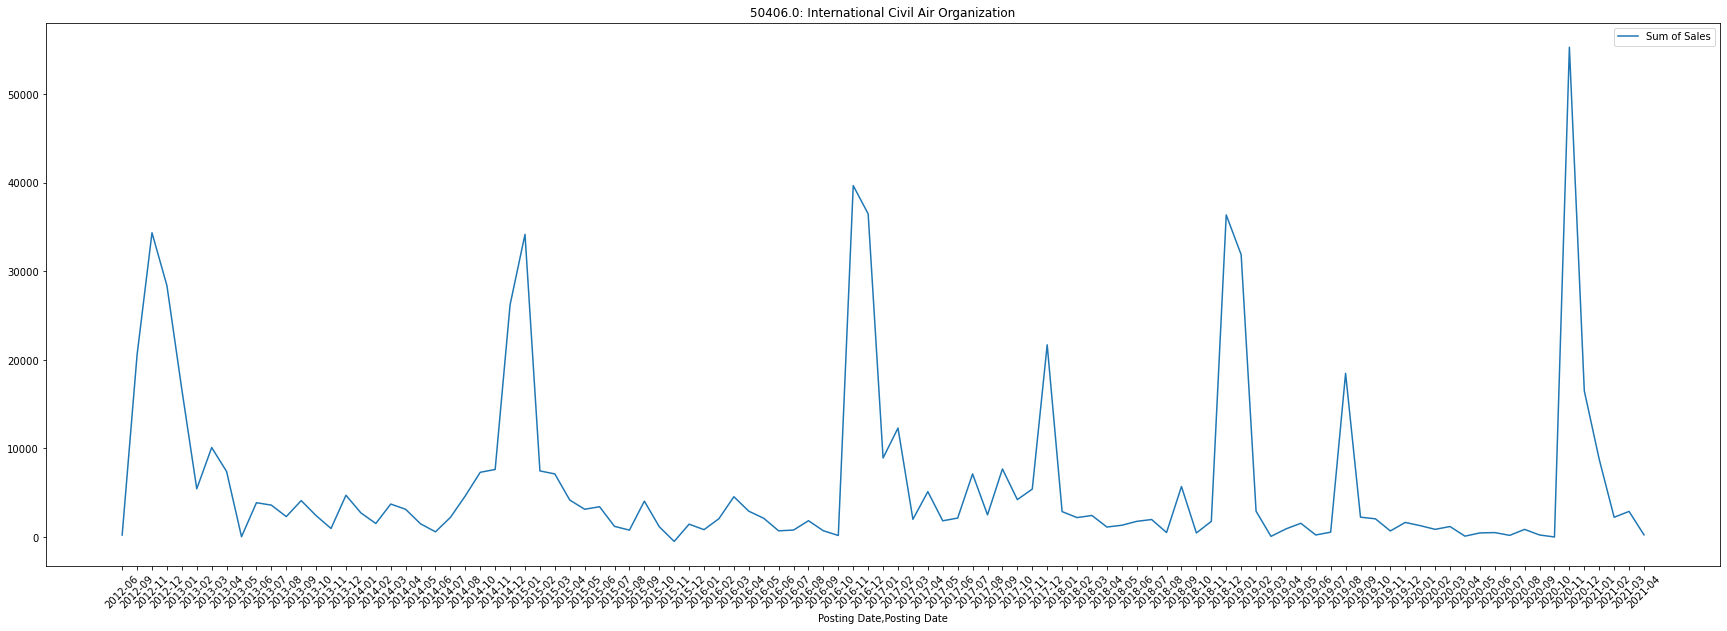

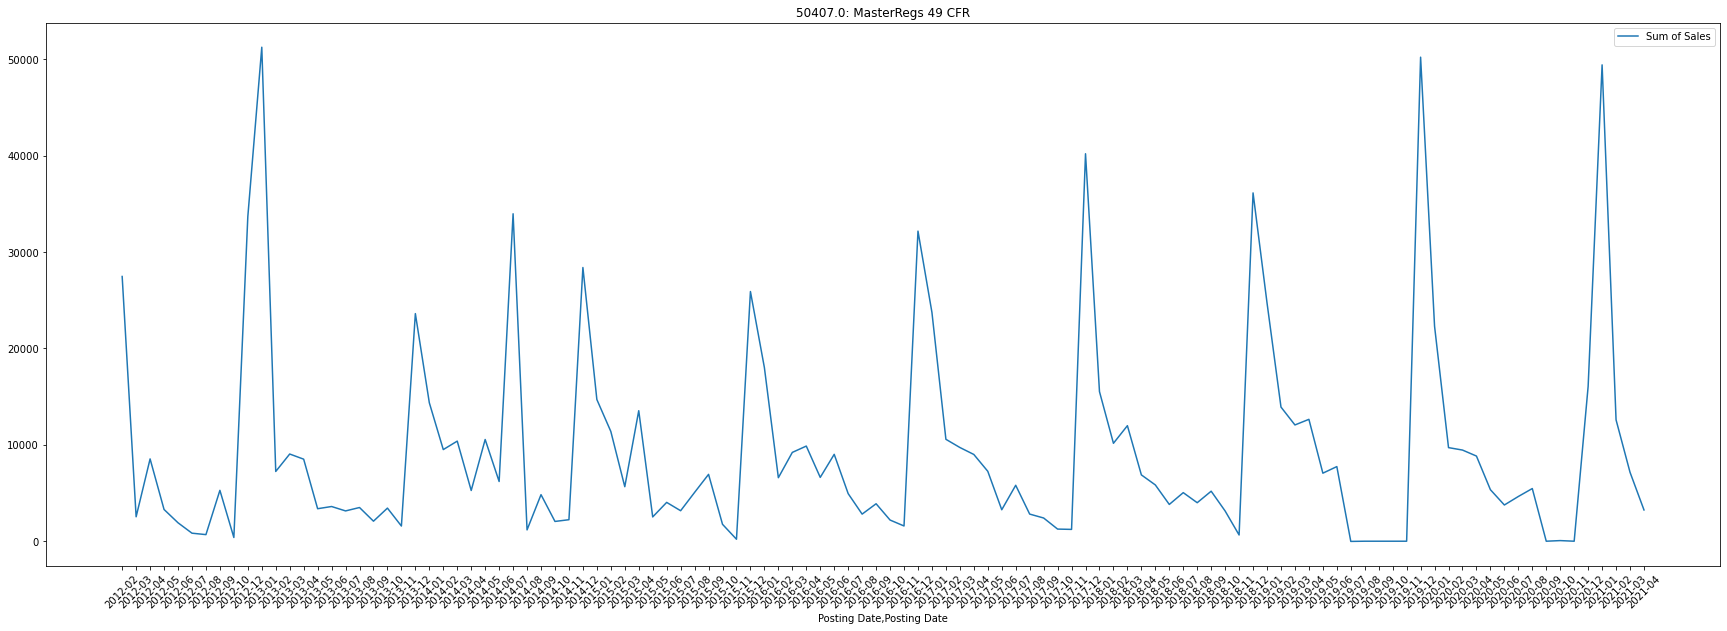

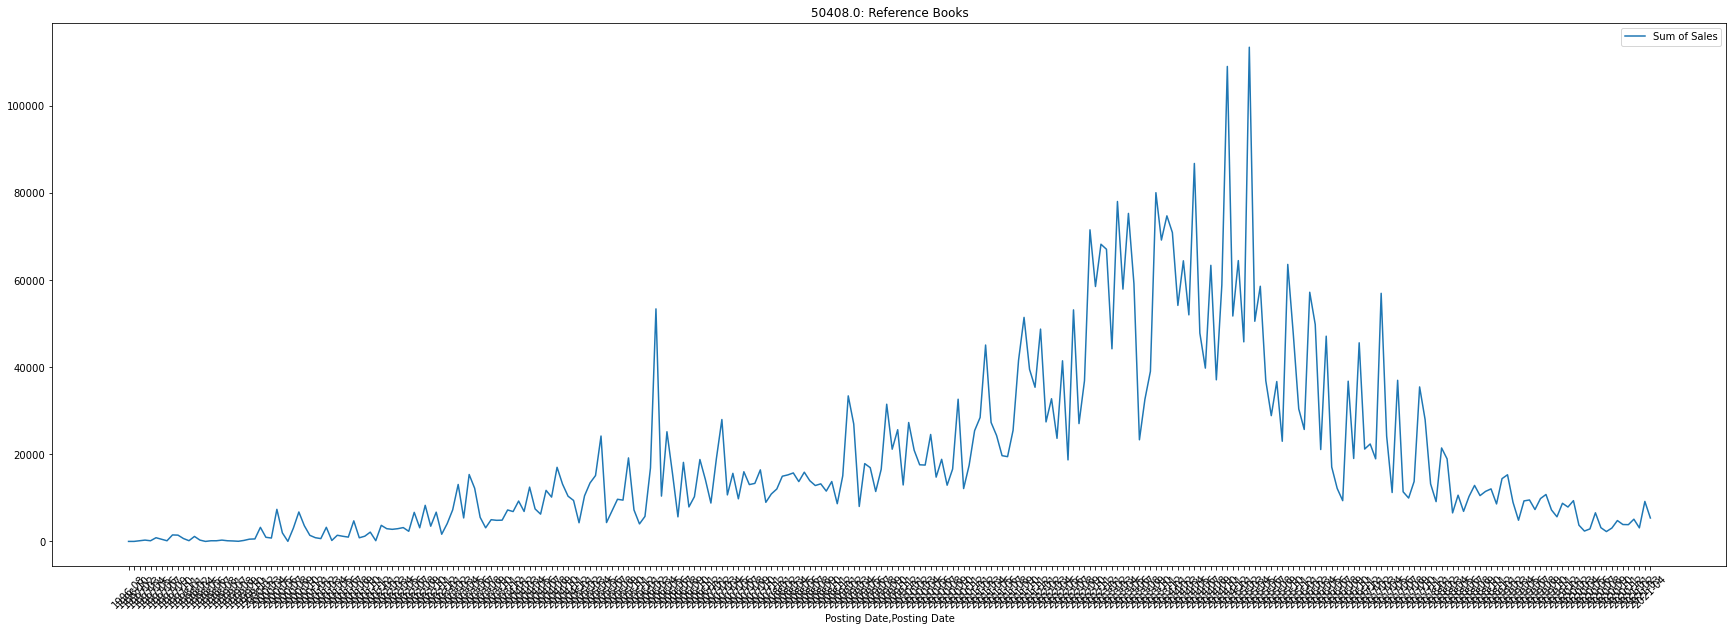

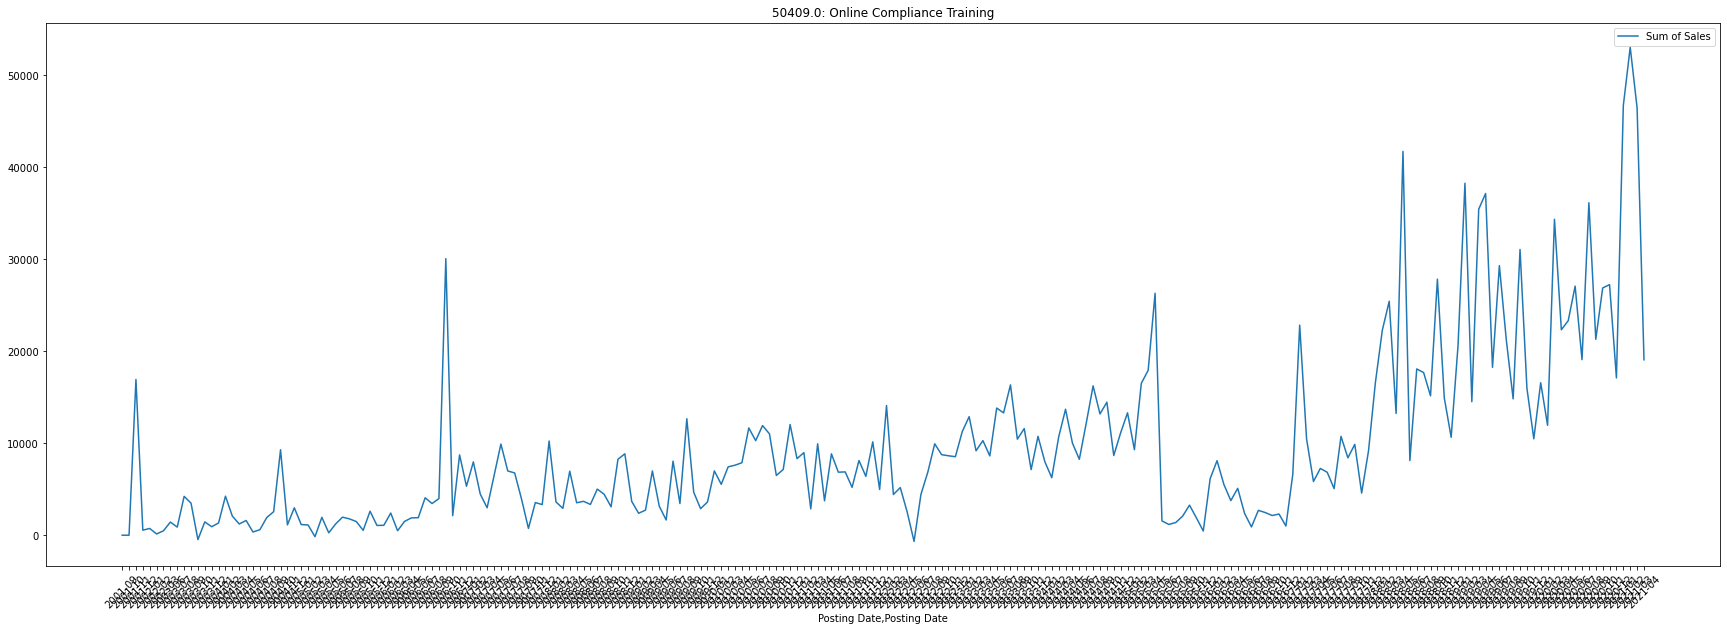

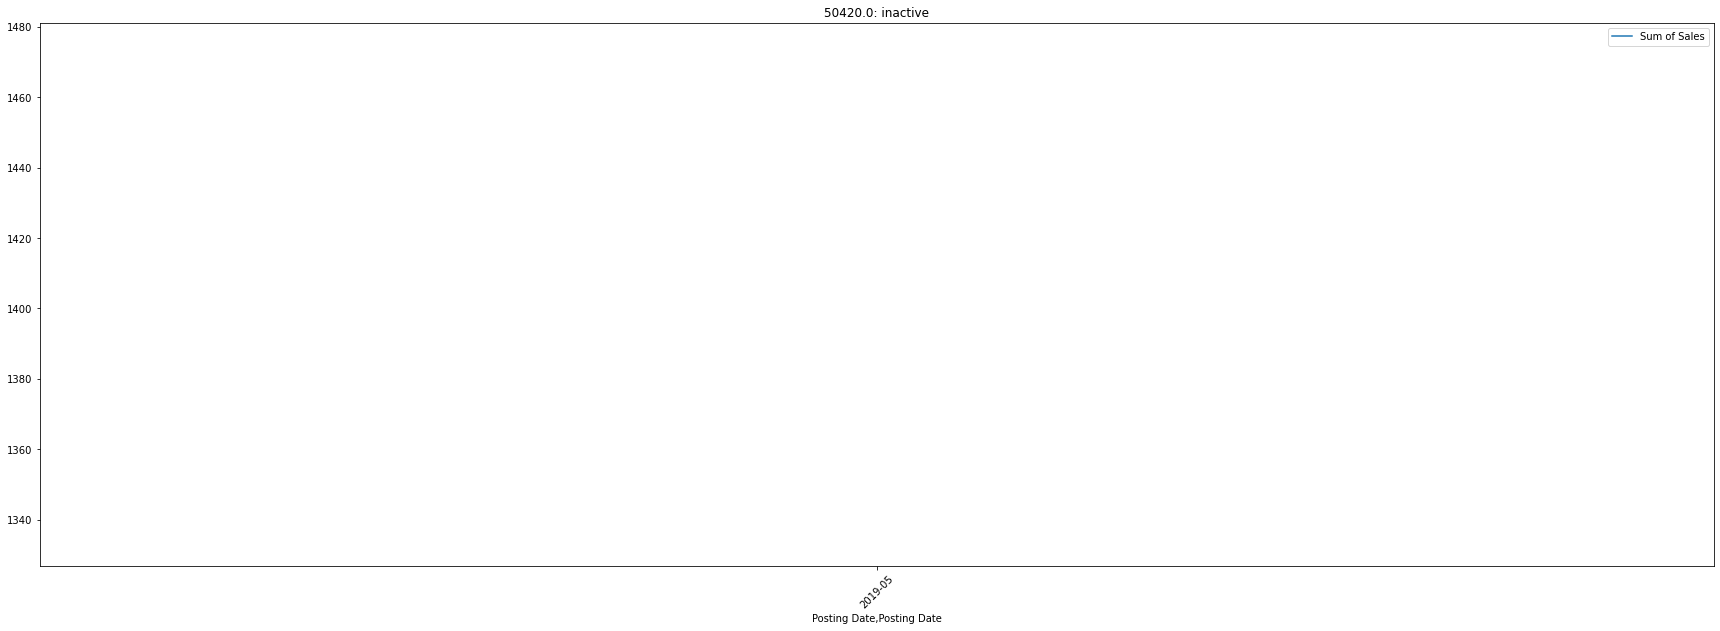

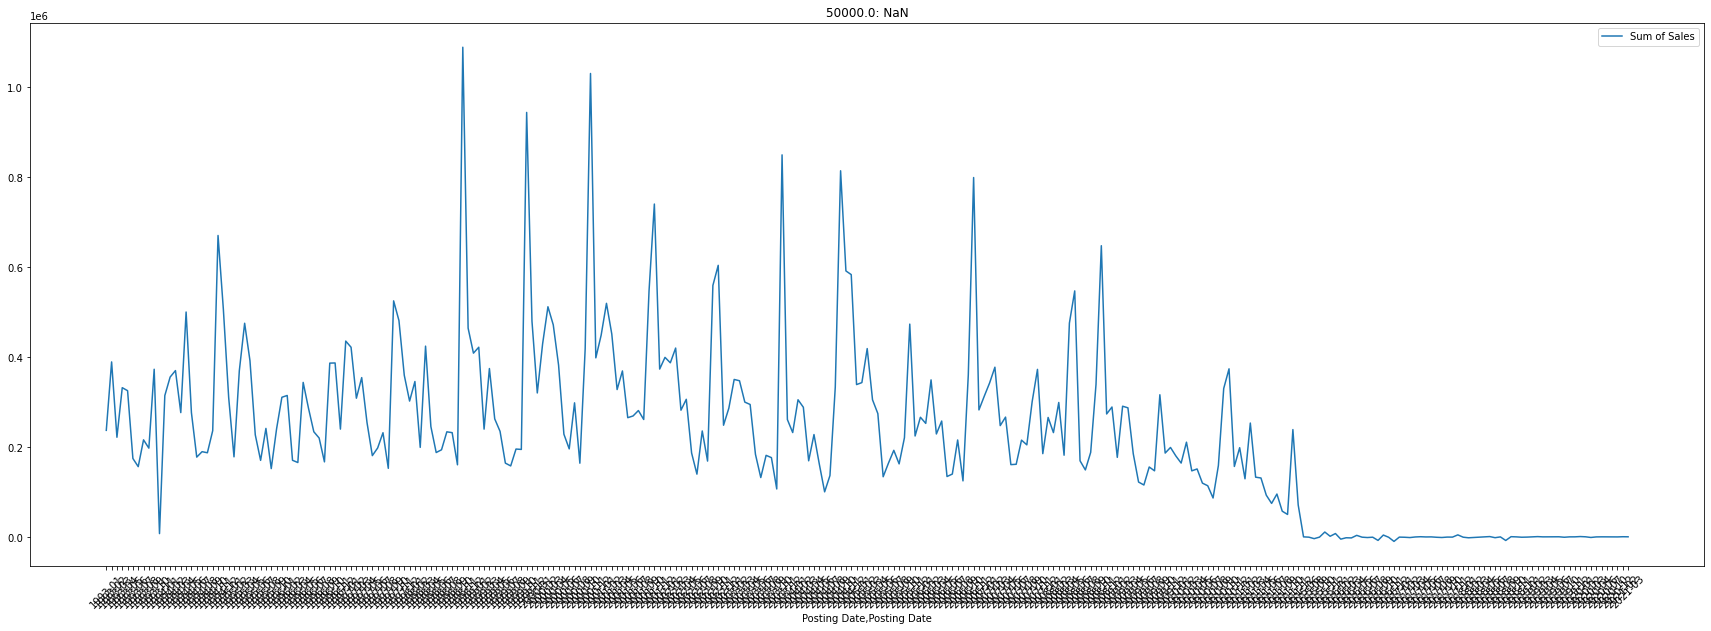

In [ ]:
for i in list(product_group_dic.keys()):
    s=books_final[books_final['Product Group Code']==float(i)].sort_values('Posting Date')
    m=s.groupby([s['Posting Date'].dt.year,s['Posting Date'].dt.month])['Sum of Sales'].sum()
    ax=m.plot(figsize=(30,10))
    plt.title('%s: %s' %(i,product_group_dic[i]))
    ax.set_xticks(range(len(m)));
    ax.set_xticklabels(["%s-%02d" % item for item in m.index.tolist()], rotation=45);
    plt.legend()
    plt.show()
    

#### By product line

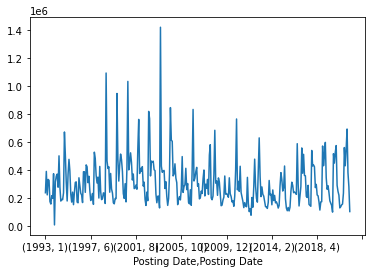

In [ ]:
books_final.groupby([books_final['Posting Date'].dt.year,books_final['Posting Date'].dt.month])['Sum of Sales'].sum().plot(x='Posting Date')
